<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ADF-Test" data-toc-modified-id="ADF-Test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ADF Test</a></span><ul class="toc-item"><li><span><a href="#ADF-Test-for-stock-price" data-toc-modified-id="ADF-Test-for-stock-price-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ADF Test for stock price</a></span></li><li><span><a href="#Get-log-returns" data-toc-modified-id="Get-log-returns-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Get log returns</a></span></li><li><span><a href="#ADF-Test-for-log-returns" data-toc-modified-id="ADF-Test-for-log-returns-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>ADF Test for log returns</a></span></li></ul></li><li><span><a href="#Cointegration" data-toc-modified-id="Cointegration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cointegration</a></span><ul class="toc-item"><li><span><a href="#Cointegration(Engle-Granger-Test)-for-stock-price" data-toc-modified-id="Cointegration(Engle-Granger-Test)-for-stock-price-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cointegration(Engle-Granger Test) for stock price</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Correlation</a></span></li></ul></li><li><span><a href="#추가-예제" data-toc-modified-id="추가-예제-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>추가 예제</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# ADF Test

Time series 회귀분석을 하기 위해서는 Stationary Process가 되어야만 회귀, OLS등이 가능하다. 만약 시계열 변수가 Linear trend나 Seasonlity를 갖는다면 비정상적인 Process의 모습을 보인다. 기댓값 또한 특정 시점에 의존하는 모습을 보이고, 시간이 흐름에 따라 Heteroscedasticity가 나타난다.

실제 시계열 자료의 대부분은 Non Stationary Process이므로, Stationary Process로 바꿔주는 작업이 필요하다.

  ->  (Augmented Dickey-Fuller test)

In [42]:
from statsmodels.tsa.stattools import coint, adfuller
import FinanceDataReader as fdr
%matplotlib inline

samsung = fdr.DataReader('005930', '2010').Close.dropna()[-2928:]
samsung

apple = fdr.DataReader('aapl', '2010').Close.dropna()[-2928:]
apple

Date
2010-01-05    16440
2010-01-06    16820
2010-01-07    16260
2010-01-08    16420
2010-01-11    15940
              ...  
2021-11-09    70500
2021-11-10    70200
2021-11-11    69900
2021-11-12    70600
2021-11-15    71500
Name: Close, Length: 2928, dtype: int64

Date
2010-03-31      8.39
2010-04-01      8.43
2010-04-05      8.52
2010-04-06      8.55
2010-04-07      8.59
               ...  
2021-11-08    150.44
2021-11-09    150.81
2021-11-10    147.92
2021-11-11    147.87
2021-11-12    149.99
Name: Close, Length: 2928, dtype: float64

## ADF Test for stock price

In [47]:
_, adf_samsung,*_ = adfuller(samsung)
_, adf_apple,*_ = adfuller(apple)

adf_samsung
adf_apple

0.9096331305199278

0.9989572558348636

p-value > 0.05 이므로 stationary하지 않음을 볼 수 있다.

## Get log returns

시계열 데이터를 stationary하게 만들때 보통 difference(차분)를 취하지만, 주식 시계열 데이터는 수익률을 취하고 편의성을 위해 이를 로그화 한다.

Date
2010-04-01    0.004756
2010-04-05    0.010620
2010-04-06    0.003515
2010-04-07    0.004667
2010-04-08   -0.002331
                ...   
2021-11-08   -0.005568
2021-11-09    0.002456
2021-11-10   -0.019349
2021-11-11   -0.000338
2021-11-12    0.014235
Name: Close, Length: 2927, dtype: float64

<AxesSubplot:xlabel='Date'>

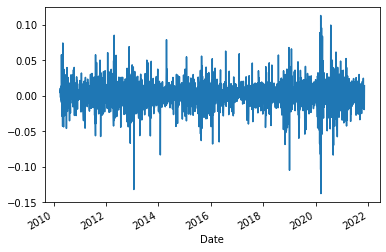

In [48]:
samsung_lret = np.log(samsung.pct_change()+1)[1:]
apple_lret = np.log(apple.pct_change()+1)[1:]

apple_lret
apple_lret.plot()

## ADF Test for log returns

In [49]:
_, adf_samsung_lret,*_ = adfuller(samsung_lret)
_, adf_apple_lret,*_ = adfuller(apple_lret)

adf_samsung_lret
adf_apple_lret

0.0

2.9653618440280175e-20

p-value < 0.05 이므로 stationary 되었다.

# Cointegration

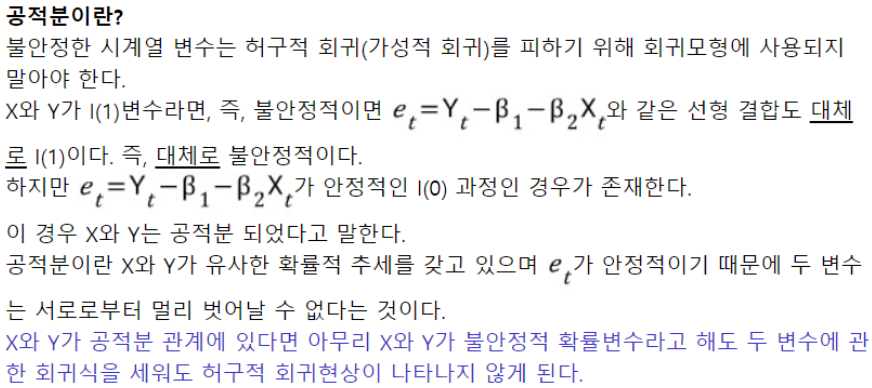

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=jahyone20&logNo=220934503719

## Cointegration(Engle-Granger Test) for stock price

In [57]:
# ## 단위를 무시하기 위해 Z-score 표준화
# samsung_zscore = (samsung - np.mean(samsung))/np.std(samsung)
# apple_zscore = (apple - np.mean(apple))/np.std(apple)

_, coint_samsung_apple,*_ = coint(samsung_zscore,apple_zscore)
coint_samsung_apple

0.6005699147380051

p-value > 0.05 이므로 공적분관계에 있지 않다.

즉, pairs가 stationary하지 않음!

## Correlation

두 자산간의 상관계수를 구한다.

In [58]:
corr_stocks = samsung_zscore.corr(apple_zscore)
corr_stocks

0.9245206876196093

상관관계가 상당히 높게 나오는 것을 알 수 있다.

<span class="mark">하지만 이것은 두 변수간의 상관관계이므로 시계열적 연관성이 있는지를 시사하지 않는다.</span>
    
<span class="mark">Cointegration != Correlation</span>

# 추가 예제

<AxesSubplot:xlabel='Date'>

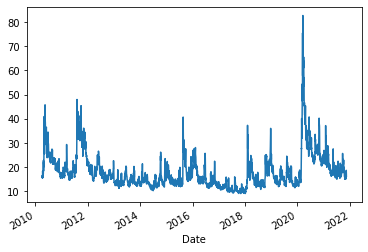

In [59]:
vix = fdr.DataReader('VIX', '2010').Close[-2928:]
vix.plot()

<AxesSubplot:xlabel='Date'>

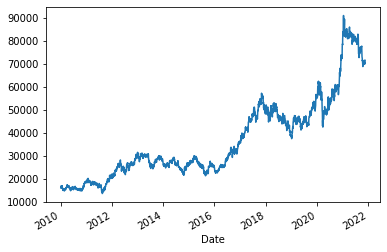

In [60]:
samsung.plot()

<AxesSubplot:xlabel='Date'>

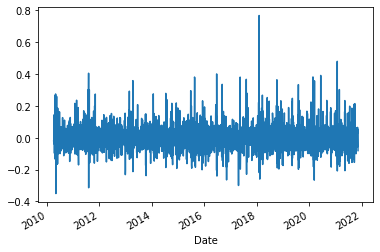

In [61]:
vix_lret = np.log(vix.pct_change()+1)[1:]
vix_lret.plot()

In [62]:
_, adf_vix, *_ = adfuller(vix)
_, adf_vix_lret, *_ = adfuller(vix_lret)

adf_vix
adf_vix_lret

7.356189084325514e-05

0.0

VIX 지수는 수익률뿐만 아니라 가격도 ADF Test를 통과

In [65]:
_, coint_samsung_vix, *_ = coint(samsung, vix)

coint_samsung_vix
samsung.corr(vix)

0.9680448103272661

-0.0009645195128188069

공적분관계에 있지 않고, 상관계수가 0에 가깝다.

# Conclusion

Time series 회귀분석을 하기 위해서는 Stationary Process가 되어야만 회귀, OLS등 분석이 가능하다. 때문에 ADF Test를 통해 Stationary를 확인하고, 부적합할 시 차분(수익률)으로 Stationary할 때까지 연산한다.

Cointegration은 두 시계열 데이터 X,Y 가 유사한 확률적 추세를 갖고 있으며, 오차가 안정적이기 때문에 두 변수는 서로로부터 멀리 벗어나지 않는 것을 말한다. 다시 말해, X와 Y가 공적분 관계에 있다면 두 변수가 불안정적 확률변수라고 해도 허구적 회귀 현상이 나타나지 않는다.

이때 공적분 관계와 상관계수는 연관이 없다.